# Exercise 3.11

For the following data set:

(a) Plot the Probability distribution for the background rate from Data set 1 only

(b) Analyze the two data sets simultaneously; plot the 2D probability density for the background and signal rates

(c) Find the 68% central credibility interval for the decay rate.

(d) If your sample had a mass of one gram, and the isotope in the sample has an atomic mass of $m_{A}$ = $110\,$g/mole, what is the lifetime of the isotope (value with uncertainty)?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

from scipy.stats import poisson
from scipy.stats import mode

In [3]:
# Data
events1 = 100.
events2 = 250.
time1 = 1000.
time2 = 2000.
rate_1 = events1/time1
rate_2 = events2/time2

In [4]:
def posterior(nu, n):
    return poisson.pmf(n, nu)

In [5]:
stepsize = 0.001
rates_bkg = np.arange(0.04,0.15,stepsize)
rates_sig = np.arange(0.00,0.08,stepsize)

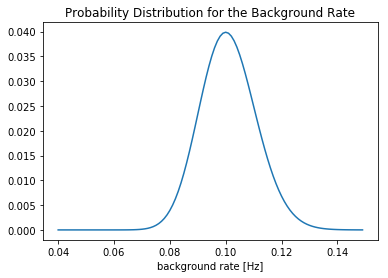

In [6]:
plt.plot(rates_bkg, posterior(rates_bkg*time1,events1))
plt.xlabel('background rate [Hz]')
plt.title('Probability Distribution for the Background Rate')
#plt.plot(Nus/time2, post_tot)
#plt.yscale('log')
#plt.plot(Nus, p_tot)

plt.show()

In [7]:
def posterior_total(r_bkg, r_sig, n_bkg, n_tot, time1, time2):
    nu_bkg = r_bkg*time1
    nu_tot = (r_bkg+r_sig)*time2
    return posterior(nu_bkg, n_bkg)*posterior(nu_tot, n_tot)

In [8]:
#assume flat priors
p_tot = np.zeros((len(rates_bkg),len(rates_sig)))

i = 0
j = 0
normalization = 0
for r_i in rates_bkg:
    j = 0
    for r_j in rates_sig:
        p_tot[i][j] = posterior_total(r_i, r_j, events1, events2, time1, time2)
        normalization += p_tot[i][j]
        j += 1
    i +=1
p_tot = p_tot/normalization
print(normalization)

0.486391504895


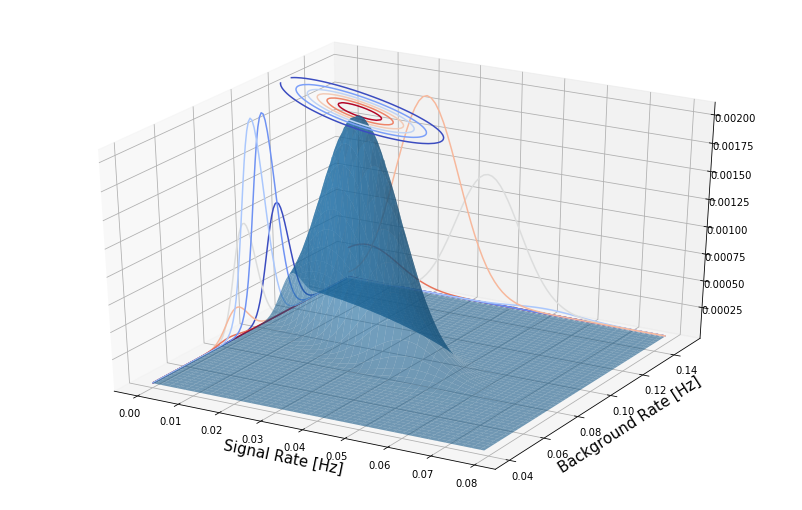

In [9]:
fig = plt.figure(figsize = (14,9))
ax = fig.gca(projection='3d')
Y, X, Z = rates_bkg, rates_sig, p_tot
X, Y = np.meshgrid(X, Y)
#X, Y, Z = Nus_x, Nus_y, posterior_total(Nus_x, Nus_y, events1, events2)
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, alpha=0.6) #, rstride=8, cstride=8, alpha=0.3)
cset = ax.contour(X, Y, Z, zdir='z', offset=0.0021, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=0., cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=0.15, cmap=cm.coolwarm)

ax.set_xlabel('Signal Rate [Hz]', fontsize=15)
#ax.set_xlim(-40, 40)
ax.set_ylabel('Background Rate [Hz]', fontsize=15)
#ax.set_ylim(-40, 40)
ax.set_zlabel('')
#ax.set_zlim(-100, 100)

plt.show()

In [10]:
# Do the marginalizations
projection_bkg = np.zeros(len(p_tot))
projection_sig = np.zeros(len(p_tot[0]))
for i in range(0,len(p_tot)):
    for j in range(0,len(p_tot[i])):
        projection_bkg[i] += p_tot[i][j]
        projection_sig[j] += p_tot[i][j]

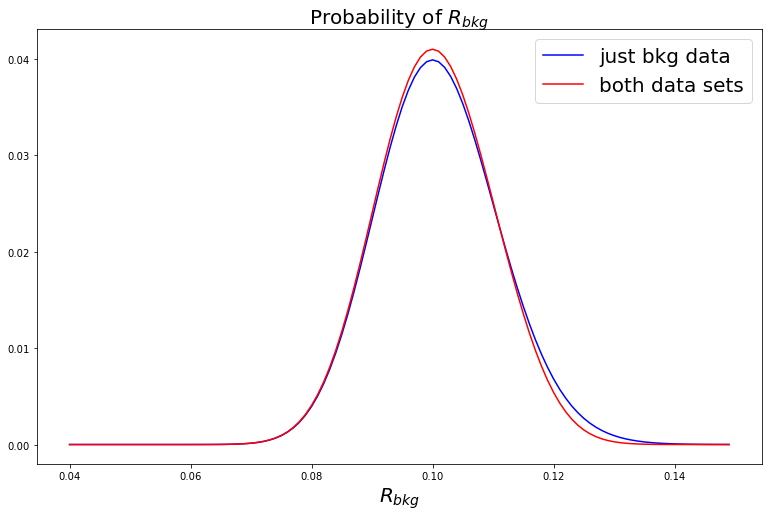

In [11]:
plt.figure(figsize=(13,8))
plt.plot(rates_bkg, posterior(rates_bkg*time1,events1), color='blue',label='just bkg data')
plt.plot(rates_bkg, projection_bkg, color='red',label='both data sets')
plt.title(r"Probability of $R_{bkg}$", fontsize=20)
plt.xlabel(r"$R_{bkg}$", fontsize=20)
plt.legend(fontsize=20)
plt.show()

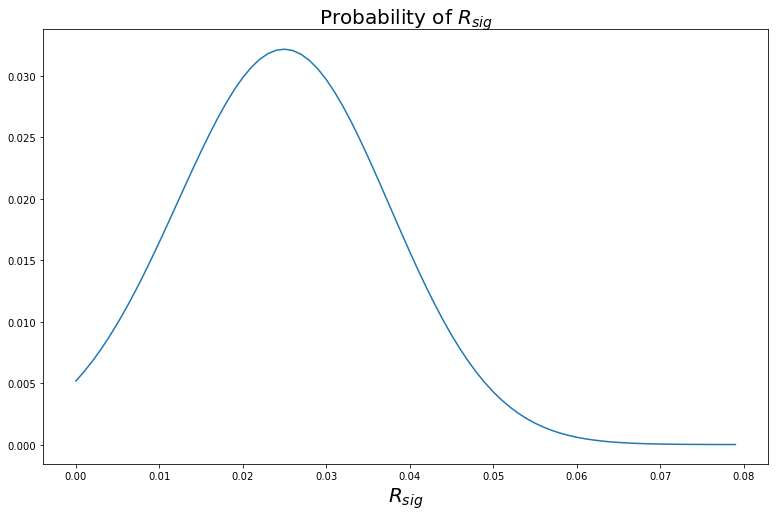

In [12]:
plt.figure(figsize=(13,8))
plt.plot(rates_sig, projection_sig)
plt.title(r"Probability of $R_{sig}$", fontsize=20)
plt.xlabel(r"$R_{sig}$", fontsize=20)
plt.show()

In [13]:
def smallest_interval_bayesian(alpha, rates, posterior_vals):
    l = list(sorted(zip(posterior_vals, rates), reverse=True))
    count = 0.
    i = 0
    x_min = x_max = 0
    mode = l[0][1]
    while count < (1-alpha):
        count+= l[i][0]
        if(l[i][1] >= mode):
            x_max = l[i][1]
        else:
            x_min = l[i][1]
        i=i+1
    return x_min, x_max, count , mode

In [14]:
x_min, x_max, c, mode_b = smallest_interval_bayesian(0.32, rates_sig, projection_sig)

In [15]:
def central_interval_bayesian(alpha,rates,posterior_vals):
    x_min_central = x_max_central = 0
    acc_sum = 0.
    i = 0
    while acc_sum <= alpha/2.0:
        acc_sum += posterior_vals[i]
        print(acc_sum)
        i=i+1
    x_min_central = rates[i-1]

    i=0
    acc_sum = 0.
    while acc_sum <= alpha/2.0:
        acc_sum += posterior_vals[-i]
        i=i+1
    x_max_central = rates[-i+1]
    return x_min_central, x_max_central, acc_sum

In [16]:
x_min_c,x_max_c,acc_sum_c = central_interval_bayesian(0.32,rates_sig, projection_sig)

0.00516816493363
0.0111142748635
0.0179192564155
0.0256656861791
0.0344365028787
0.044313513597
0.0553757092098
0.0676974137209
0.0813463020979
0.0963813310608
0.112850636554
0.130789459791
0.15021817024
0.171140458139


In [17]:
print("Mode: "+ str(mode_b))
print("68% Smallest Credible Interval: ["+ str(x_min)+", "+str(x_max)+"]")
print("68% Central Credible Interval: [" + str(x_min_c)+", "+str(x_max_c)+"]")

Mode: 0.025
68% Smallest Credible Interval: [0.013, 0.037]
68% Central Credible Interval: [0.013, 0.038]


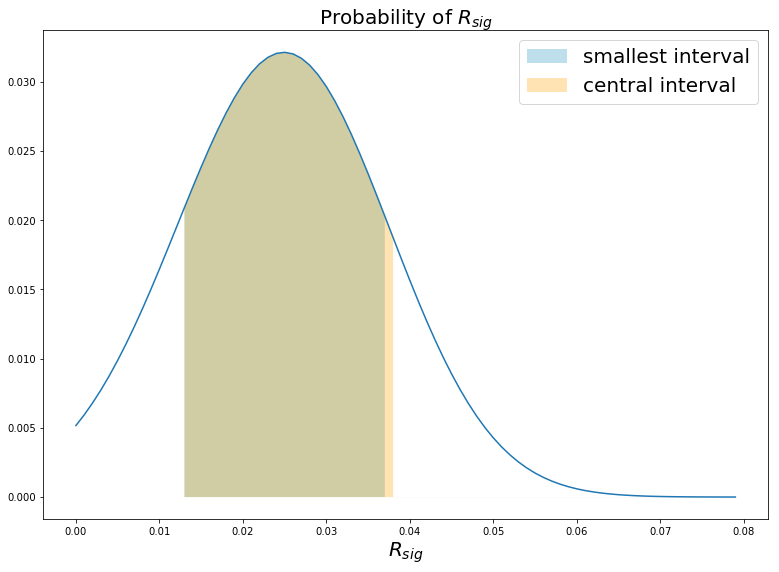

In [18]:
plt.figure(figsize=(13,9))
plt.plot(rates_sig, projection_sig)
plt.fill_between(rates_sig, 0,projection_sig,where = rates_sig>=x_min, alpha=0.8, facecolor='lightblue',label='smallest interval')
plt.fill_between(rates_sig, 0,projection_sig,where = rates_sig>=x_max, alpha=1.0, facecolor='white')
plt.fill_between(rates_sig, 0,projection_sig,where = rates_sig>=x_min_c, alpha=0.3,facecolor = 'orange',label = 'central interval')
plt.fill_between(rates_sig, 0,projection_sig,where = rates_sig>=x_max_c, alpha=1.0, facecolor='white')
plt.xlabel(r'$R_{sig}$',fontsize=20)
plt.title(r'Probability of $R_{sig}$', fontsize=20)
plt.legend(fontsize=20)
plt.show()

In [19]:
# d)
m = 1.
M = 110.
Na = 6.022e23

We actually get a probability for the activity(desintegrations per second)=$\nu$. We write the activity, A:
\begin{align}
A(t) =& \lambda \cdot N(t) \\
    A_{curr} =& \frac{ln2}{T_{1/2}} \cdot m \frac{N_{A}}{M} = R_{sig} \\
    \rightarrow T_{1/2} =& \frac{ln2}{R_{sig}} \cdot m \frac{N_{A}}{M}
\end{align}

In [20]:
n_curr = Na/M
sec_per_year = 60*60*24*365.25

t_12 = math.log(2)/mode_b * n_curr  /sec_per_year
print(t_12)

4.80982805621e+15


In [21]:
#uncertainties
t_12_min = math.log(2)/x_max * n_curr /sec_per_year
print(t_12_min)
t_12_max = math.log(2)/x_min * n_curr /sec_per_year
print(t_12_max)
print("in terms of pm")
print(t_12-t_12_min)
print(t_12_max-t_12)

3.24988382176e+15
9.24966933886e+15
in terms of pm
1.55994423445e+15
4.43984128265e+15


## The Halflife of the Isotope is:
\begin{equation}
T_{1/2} = 4.81^{+4.44}_{-1.56}\, \cdot 10^{15}~\text{years}
\end{equation}

The mean lifetime is defined as :
\begin{align}
l =& 1.44 \cdot T_{1/2}\\
l =& 6.93^{+6.39}_{-2.25} \cdot 10^{15}~\text{years}
\end{align}


e.g. $^{113}$Cd,$~~~ T_{1/2}$ = $7.7\cdot 10^{15}~\text{years}$, M = 112.9 g/mole